<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/4.%20Estadistica/Analisis_estadistico_stpor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [225]:
!pip install -U -q PyDrive

In [226]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [227]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [228]:
downloaded = drive.CreateFile({'id':'1jGowyOv11NO2VG0n5iI-QqymS4TCuGPg'})
downloaded.GetContentFile('stmat.csv')

In [229]:
datos1 = pd.read_csv('stmat.csv',sep=',',encoding='latin-1')

In [230]:
datos1.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [231]:
datos1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [232]:
datos1["school"].unique()

array(['GP', 'MS'], dtype=object)

In [233]:
datos1["sex"].unique()

array(['F', 'M'], dtype=object)

In [234]:
Tab=pd.crosstab(datos1.school,datos1.sex)
Tab.index=['Gabriel Pereira','Mousinho da Silveira']
Tab.columns=['Mujeres','Hombres']
Tab

,Mujeres,Hombres
Gabriel Pereira,183,166
Mousinho da Silveira,25,21


In [235]:
pd.crosstab(datos1.school,datos1.sex,margins=True)

sex,F,M,All
school,,,
GP,183,166,349
MS,25,21,46
All,208,187,395


In [236]:
#https://drive.google.com/file/d/1mC_YY-LAVptrTJv6BWjbG8XgIdVeN0NM/view?usp=drive_link
downloaded = drive.CreateFile({'id':'1mC_YY-LAVptrTJv6BWjbG8XgIdVeN0NM'})
downloaded.GetContentFile('stpor.csv')

In [237]:
datos2 = pd.read_csv('stpor.csv',sep=',',encoding='latin-1')

In [238]:
datos2.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [239]:
Tab=pd.crosstab(datos2.school,datos2.sex)
Tab.index=['Gabriel Pereira','Mousinho da Silveira']
Tab.columns=['Mujeres','Hombres']
Tab

,Mujeres,Hombres
Gabriel Pereira,237,186
Mousinho da Silveira,146,80


In [240]:
pd.crosstab(datos2.school,datos2.sex,margins=True)

sex,F,M,All
school,,,
GP,237,186,423
MS,146,80,226
All,383,266,649


In [241]:
pd.crosstab(datos1.famrel,datos1.sex)

sex,F,M
famrel,,
1,5,3
2,9,9
3,38,30
4,107,88
5,49,57


In [242]:
pd.crosstab(datos2.famrel,datos2.sex)

sex,F,M
famrel,,
1,17,5
2,17,12
3,63,38
4,190,127
5,96,84


<Axes: xlabel='school'>

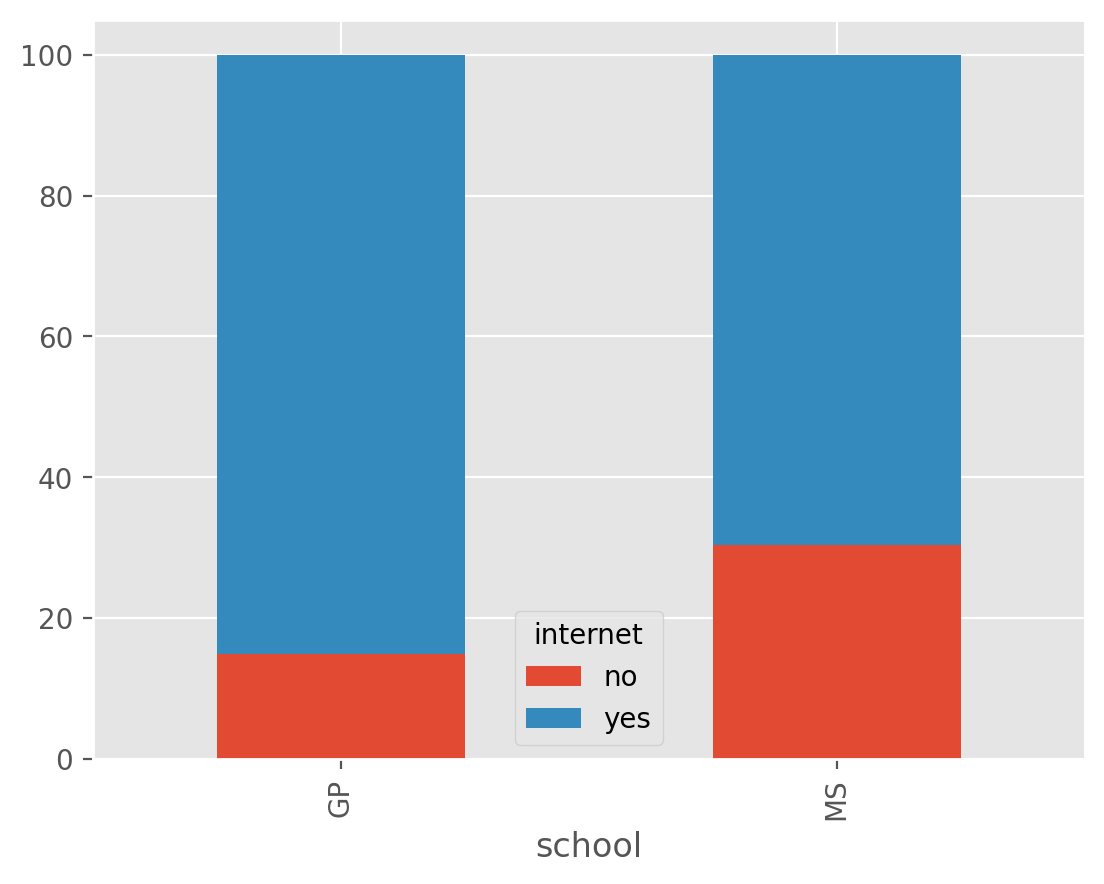

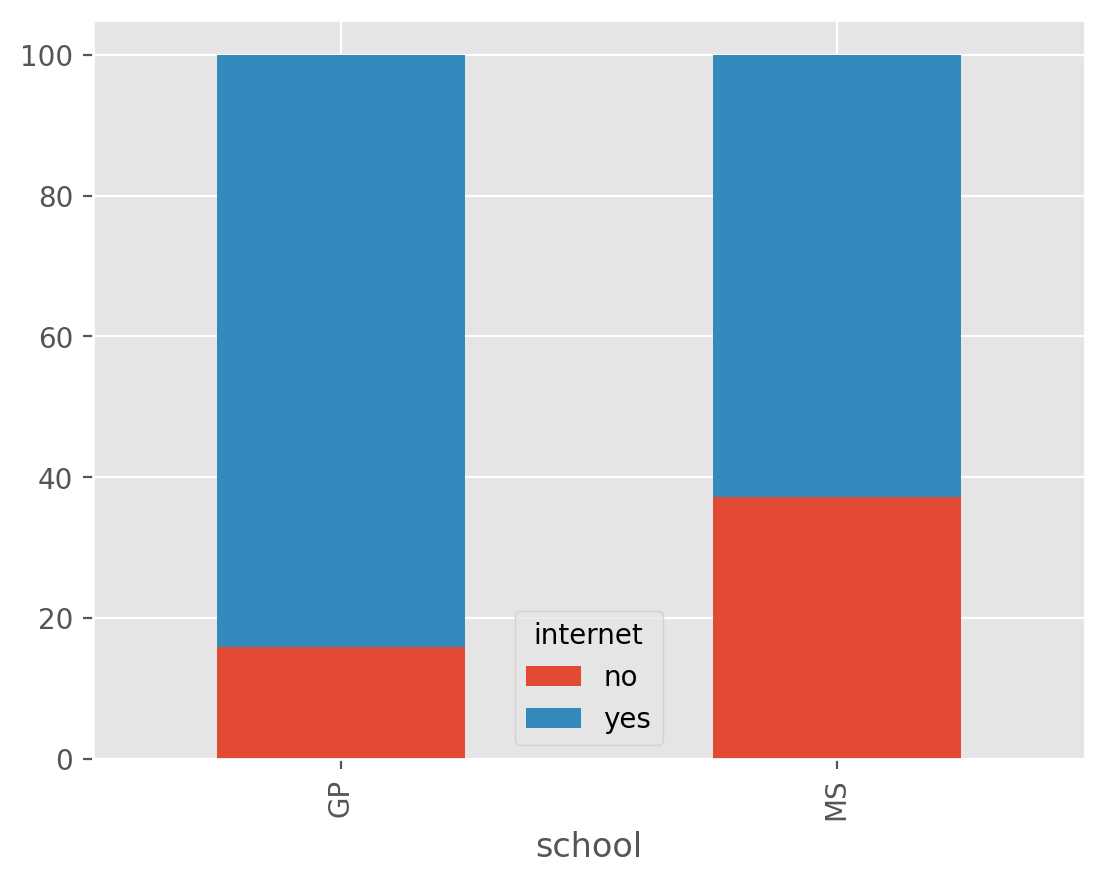

In [243]:
round(pd.crosstab(datos1.school,datos1.internet,normalize='index')*100,2).plot(kind='bar',stacked = 'True')
round(pd.crosstab(datos2.school,datos2.internet,normalize='index')*100,2).plot(kind='bar',stacked = 'True')

<Axes: xlabel='school'>

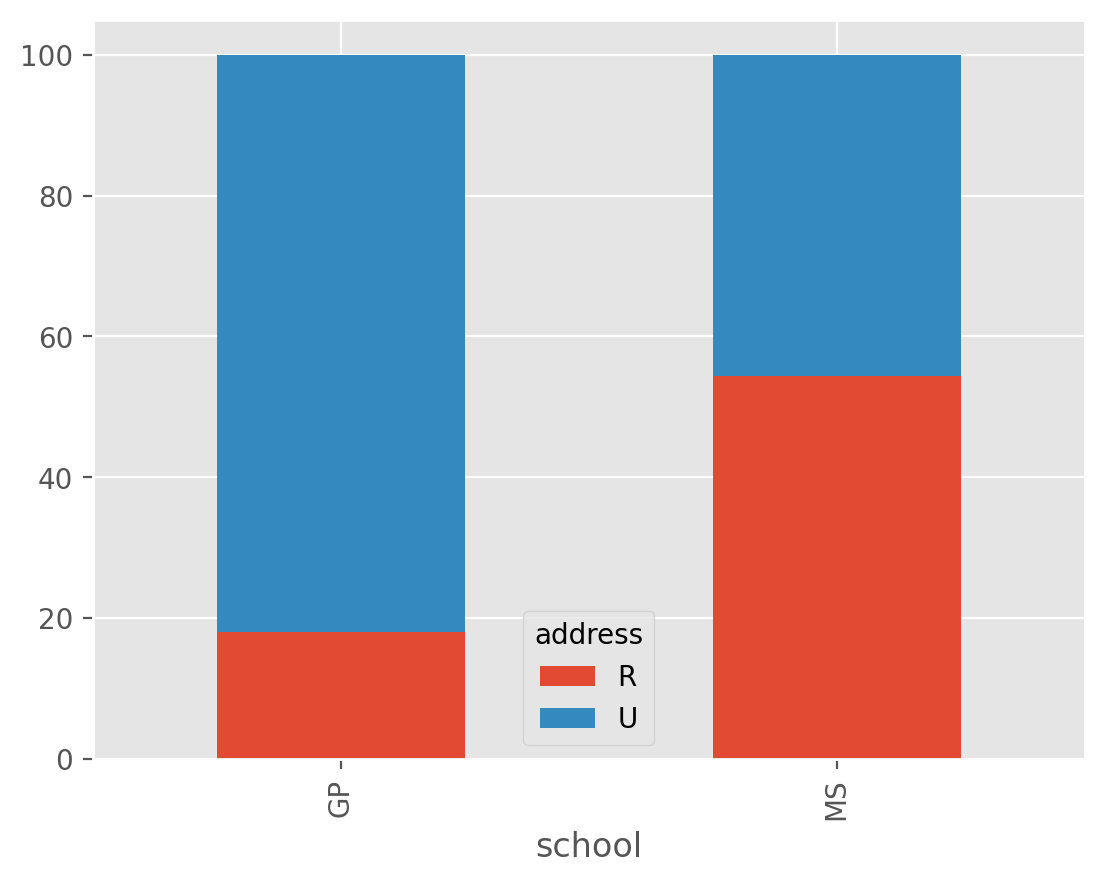

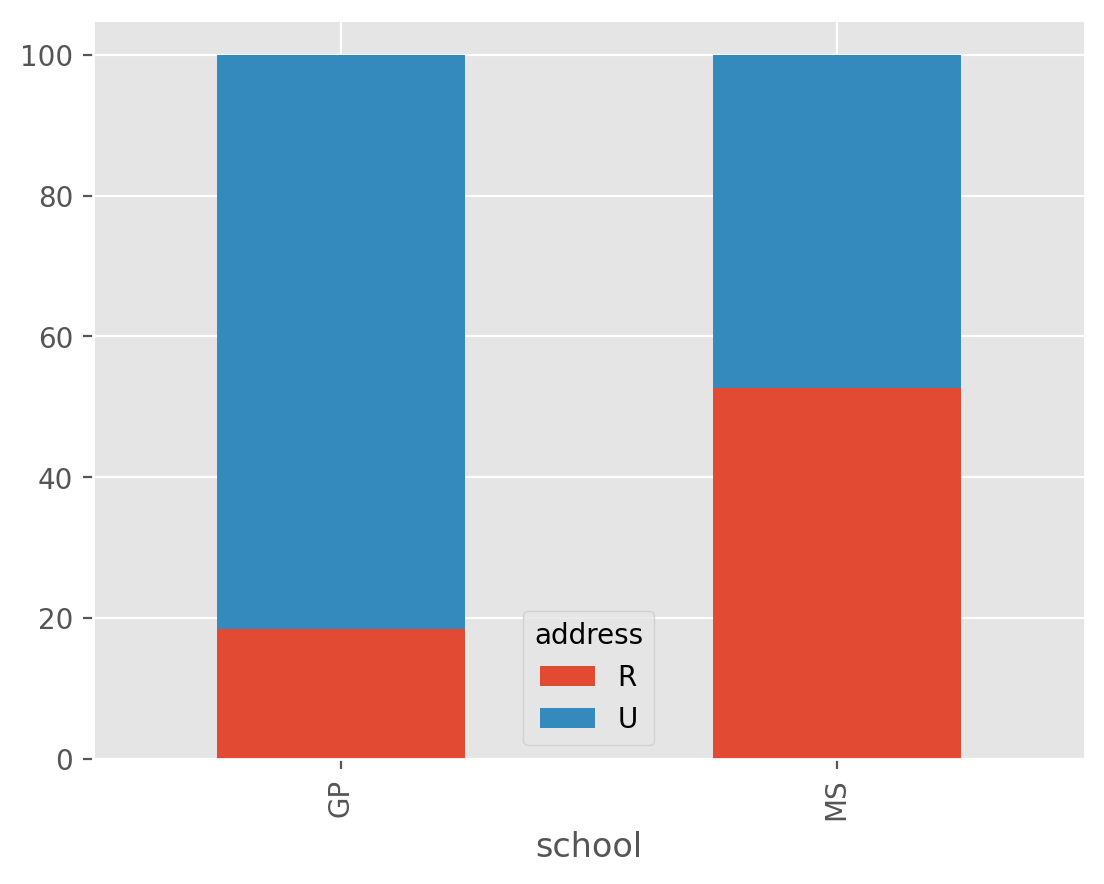

In [244]:
round(pd.crosstab(datos1.school,datos1.address,normalize='index')*100,2).plot(kind='bar',stacked = 'True')
round(pd.crosstab(datos2.school,datos2.address,normalize='index')*100,2).plot(kind='bar',stacked = 'True')

In [245]:
aprobados1=datos1[datos1.G3>10].sex.value_counts()#106 mujeres y 103 varones aprobaron matemáticas

In [246]:
aprobados2=datos2[datos2.G3>10].sex.value_counts()#171 mujeres y 103 varones aprobaron portugues

In [247]:
tab_aprobados1=pd.crosstab(datos1[datos1.G3>10].school,datos1[datos1.G3>10].sex)
tab_aprobados1

sex,F,M
school,,
GP,92,98
MS,11,8


In [248]:
tab_total1=pd.crosstab(datos1.school,datos1.sex)
tab_total1

sex,F,M
school,,
GP,183,166
MS,25,21


In [249]:
100*round(tab_aprobados1/tab_total1,3)  ## % de aprobación de estudiantes por sexo en cada escuela.

sex,F,M
school,,
GP,50.3,59.0
MS,44.0,38.1


In [250]:
tab_aprobados2=pd.crosstab(datos2[datos2.G3>10].school,datos2[datos2.G3>10].sex)
tab_aprobados2

sex,F,M
school,,
GP,204,134
MS,77,37


In [251]:
tab_total2=pd.crosstab(datos2.school,datos2.sex)
tab_total2

sex,F,M
school,,
GP,237,186
MS,146,80


In [252]:
100*round(tab_aprobados2/tab_total2,3)

sex,F,M
school,,
GP,86.1,72.0
MS,52.7,46.2


Conclusión:
En la escuela GP los hombres(59) tiene una tasa de aprobación mayor que las mujeres(50.3). Caso contrário ocurre en la escuela MS, la tasa de aprobación de mujeres(44) es mayor que la tasa de aprobación de hombres (38) para el curso de matematicas.
En la escuela GP las mujeres(86.1)  tiene una tasa de aprobación mayor que las hombres(72), y en el MS la tasa de aprobación de mujeres (52.7) es mayor que la tasa de aprobación de hombres (46.2) para el curso de portugués.

En la escula MS las mujeres tienen mayor porcentaje de aprobación tanto de matemáticas como en portugués.

En la escuela GP la cantidad de aprobados en mayor que en la escuela MS, ya sea en matemáticas o portugués

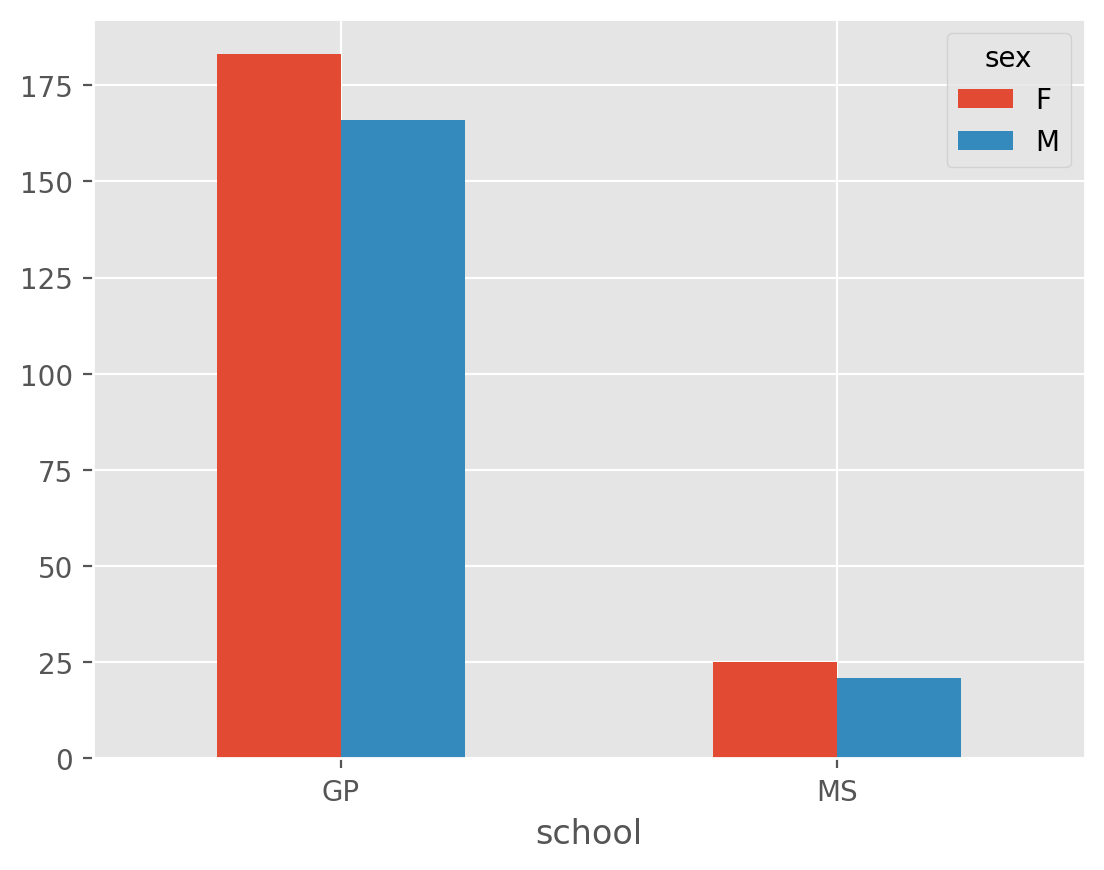

In [253]:
pd.crosstab(datos1.school,datos1.sex).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [254]:
pd.crosstab(datos1.school,datos1.sex)

sex,F,M
school,,
GP,183,166
MS,25,21


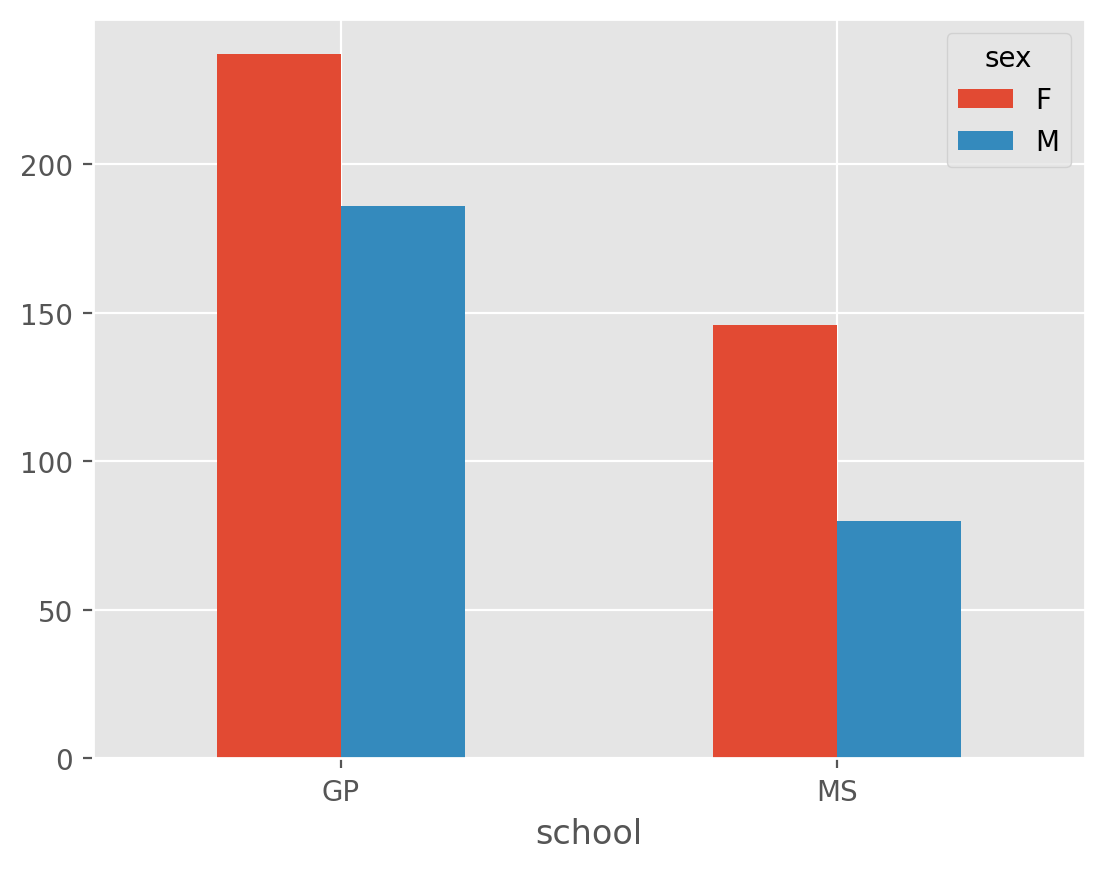

In [255]:
pd.crosstab(datos2.school,datos2.sex).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [256]:
pd.crosstab(datos2.school,datos2.sex)

sex,F,M
school,,
GP,237,186
MS,146,80


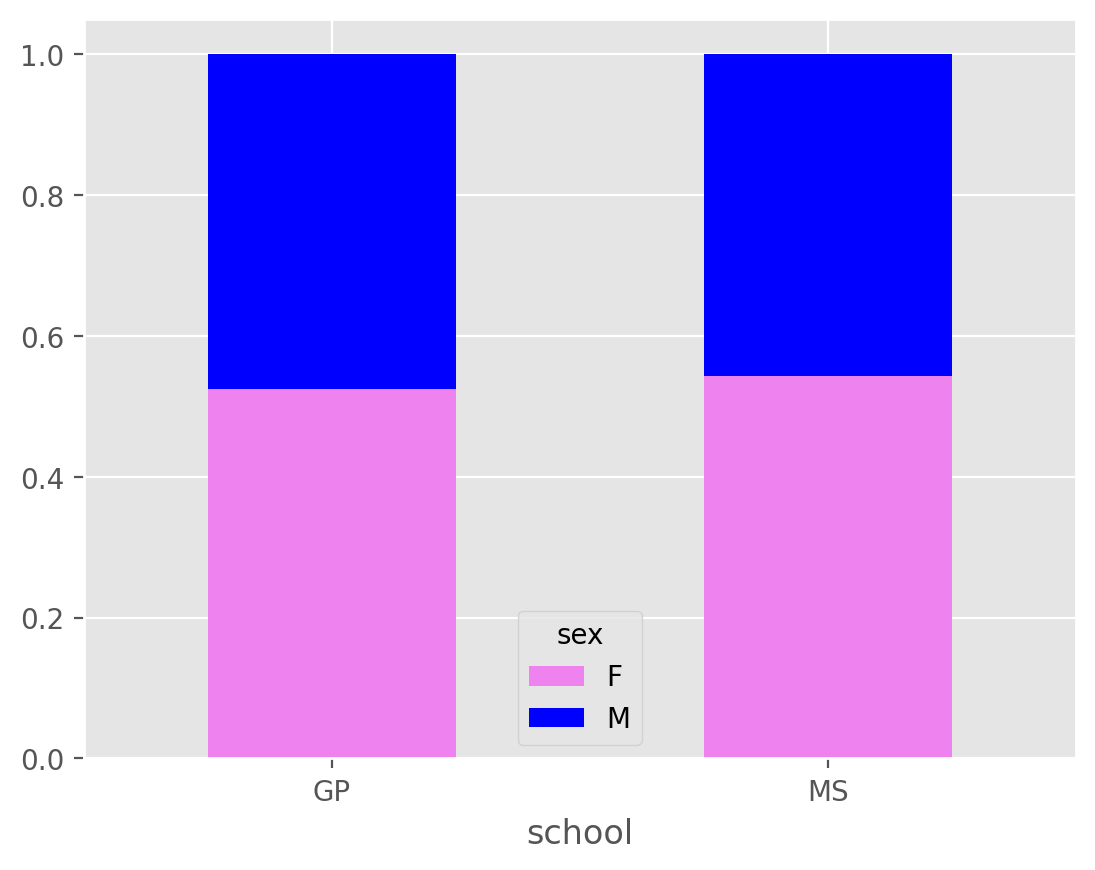

In [257]:
pd.crosstab(datos1.school,datos1.sex,normalize='index').plot(kind='bar',stacked = 'True',color=['violet','blue'])
plt.xticks(rotation=0)
plt.show()

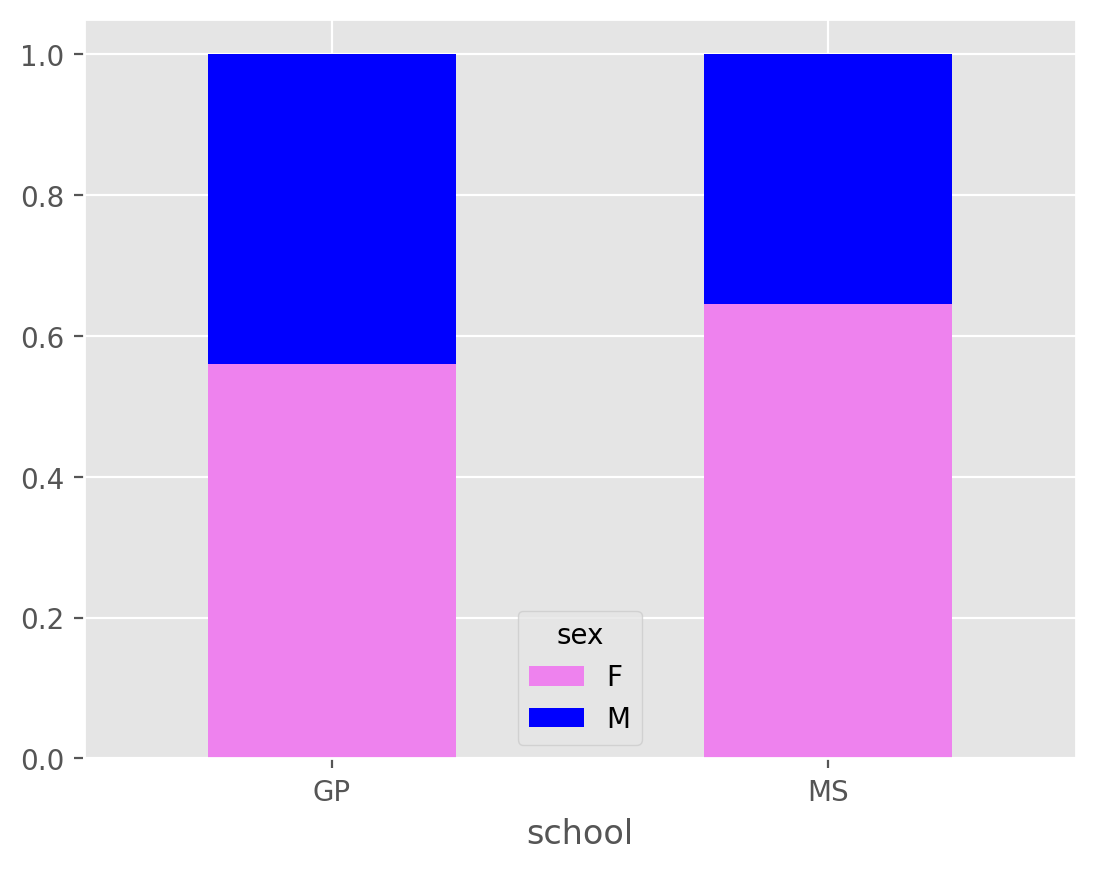

In [258]:
pd.crosstab(datos2.school,datos2.sex,normalize='index').plot(kind='bar',stacked = 'True',color=['violet','blue'])
plt.xticks(rotation=0)
plt.show()

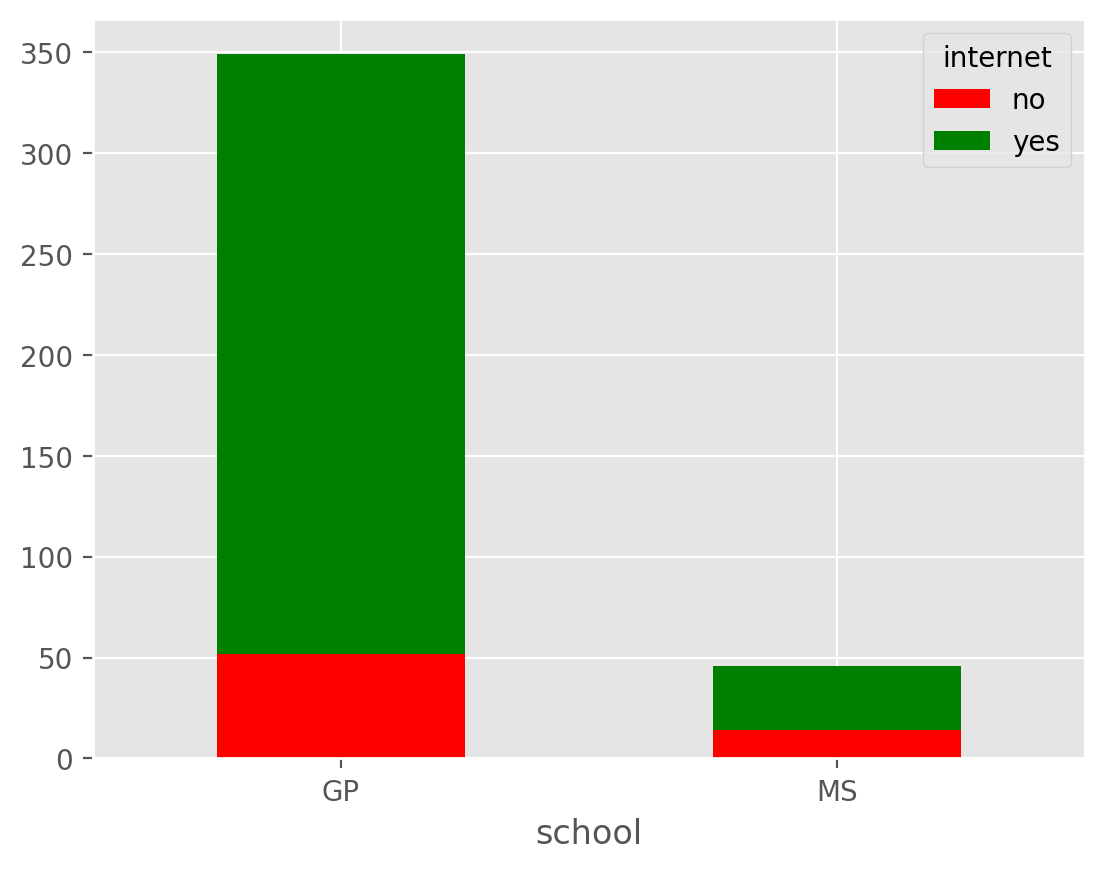

In [259]:
pd.crosstab(datos1.school,datos1.internet).plot(kind='bar',stacked = 'True',color=['red','green'])
plt.xticks(rotation=0)
plt.show()

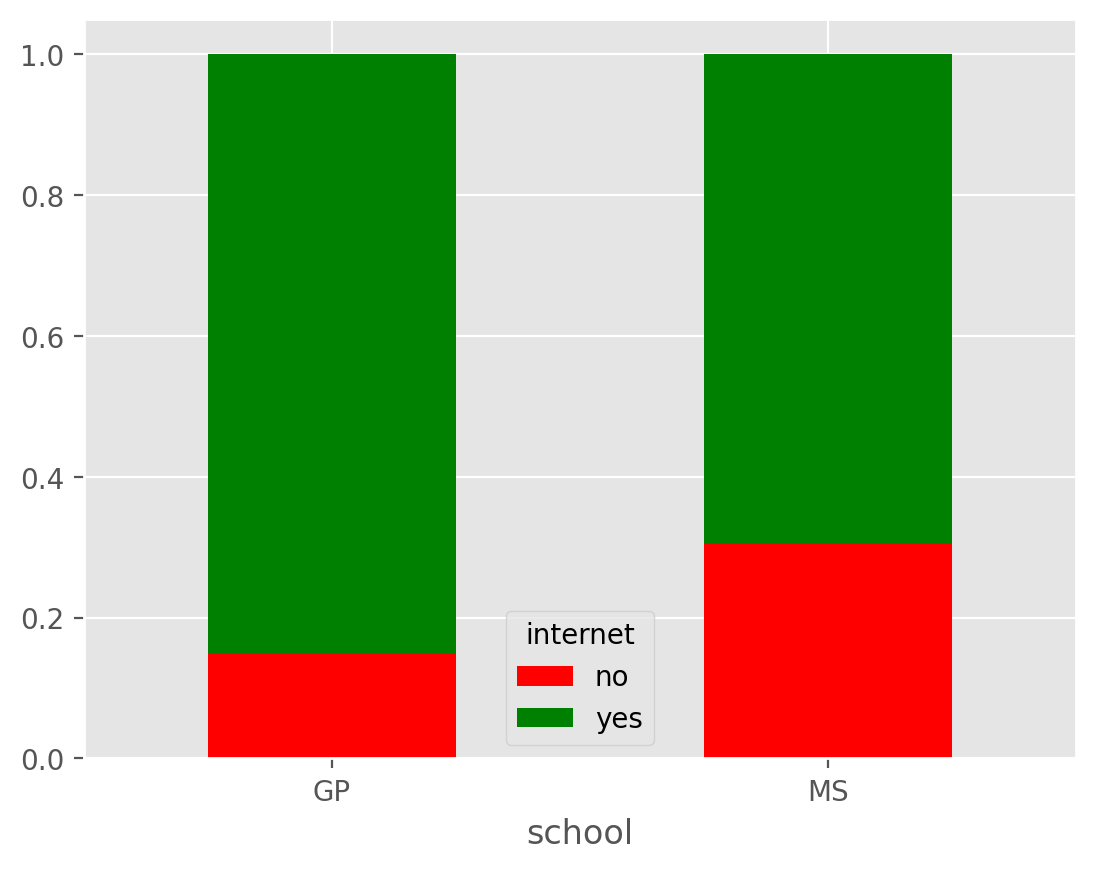

In [260]:
pd.crosstab(datos1.school,datos1.internet,normalize='index').plot(kind='bar',stacked = 'True',color=['red','green'])
plt.xticks(rotation=0)
plt.show()

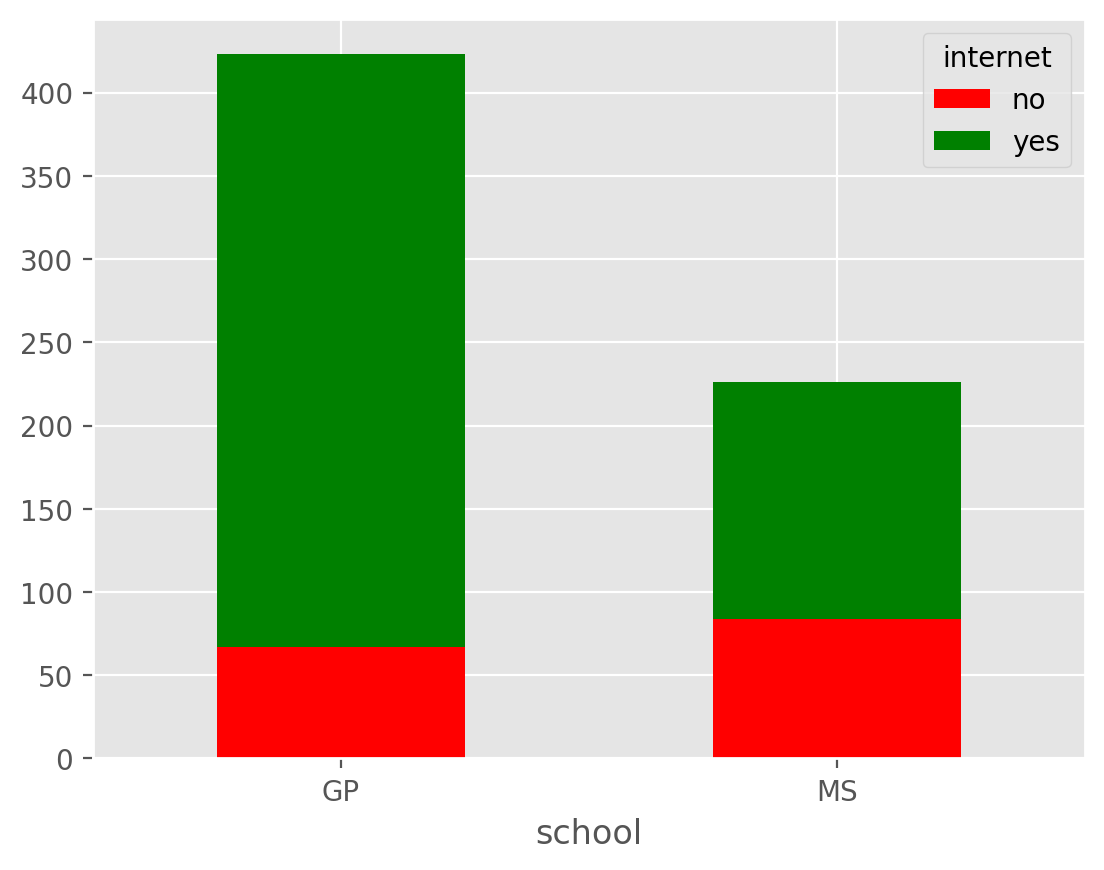

In [261]:
pd.crosstab(datos2.school,datos2.internet).plot(kind='bar',stacked = 'True',color=['red','green'])
plt.xticks(rotation=0)
plt.show()

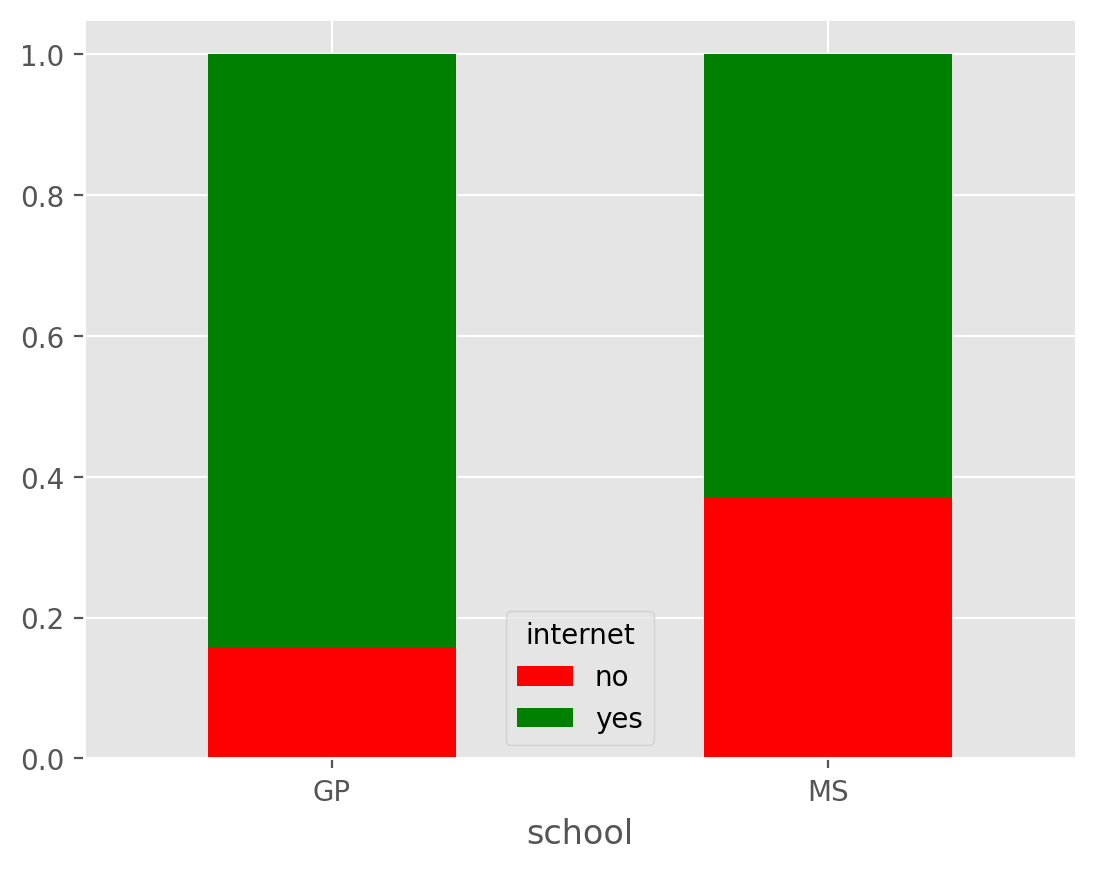

In [262]:
pd.crosstab(datos2.school,datos2.internet,normalize='index').plot(kind='bar',stacked = 'True',color=['red','green'])
plt.xticks(rotation=0)
plt.show()

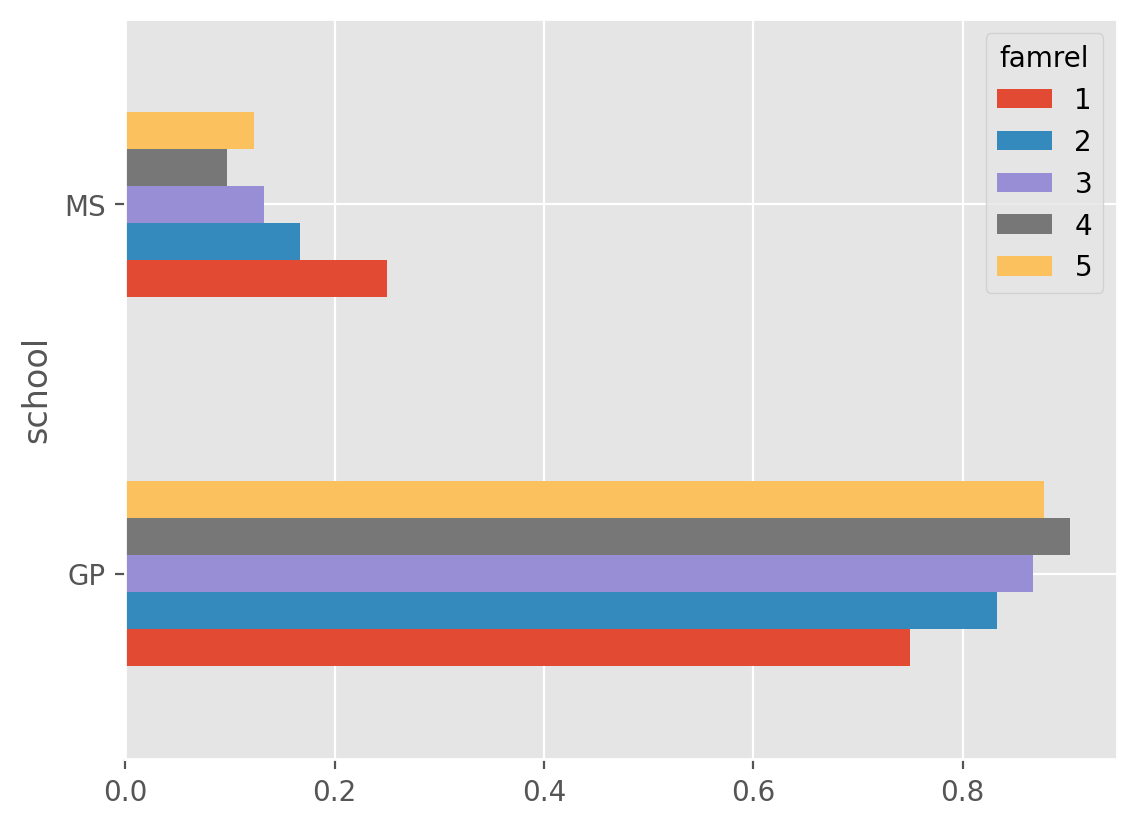

In [332]:
pd.crosstab(datos1.school,datos1.famrel).plot(kind='barh')
plt.xticks(rotation=0)
plt.show()

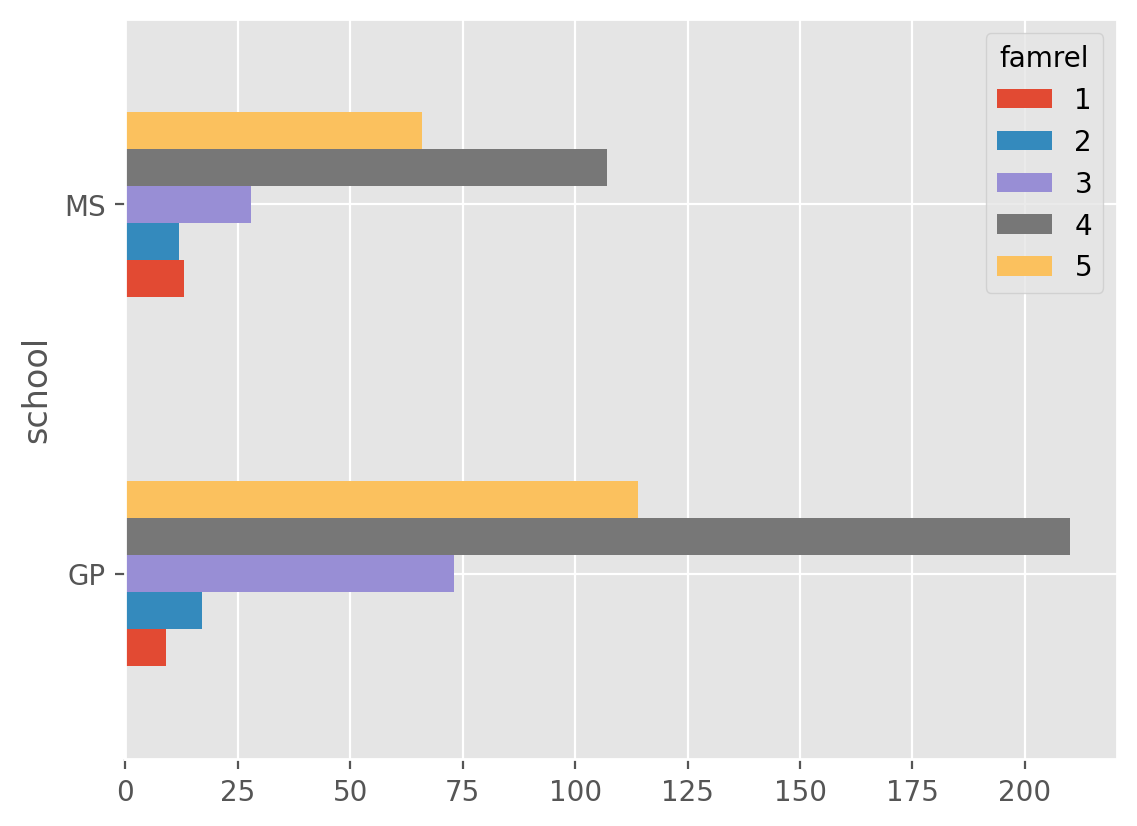

In [264]:
pd.crosstab(datos2.school,datos2.famrel).plot(kind='barh')
plt.xticks(rotation=0)
plt.show()

<Axes: >

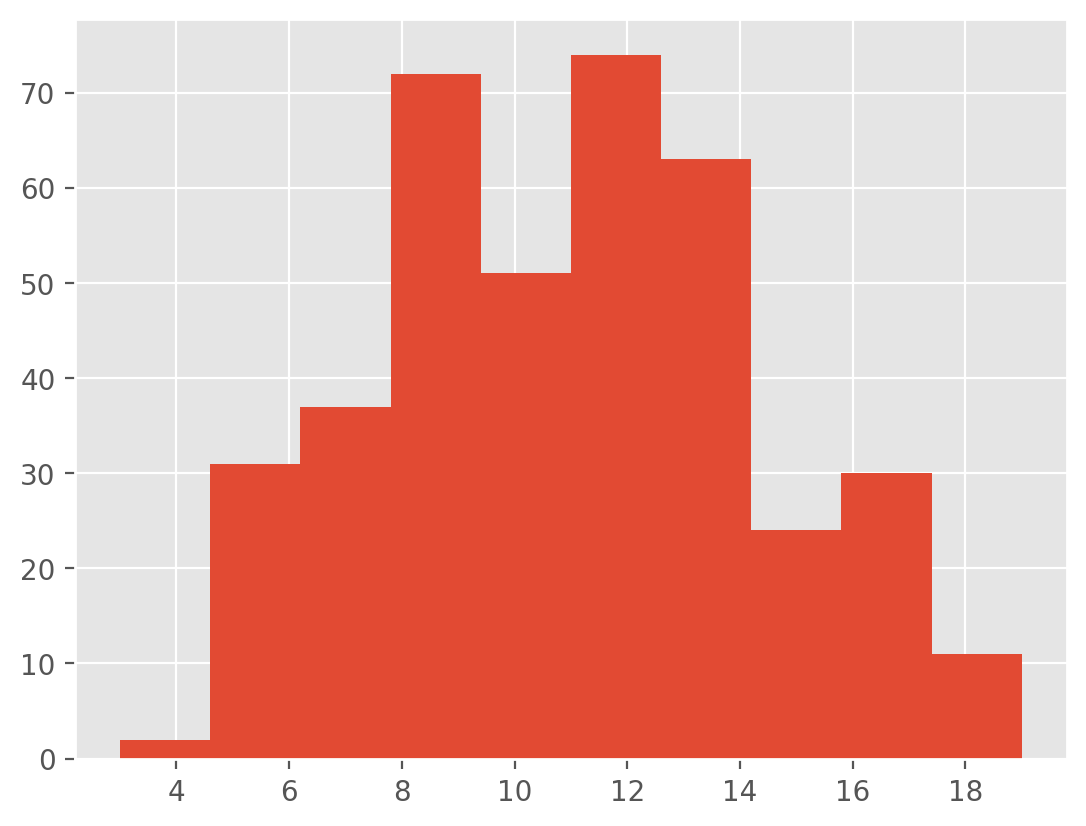

In [265]:
datos1.G1.hist()

<Axes: >

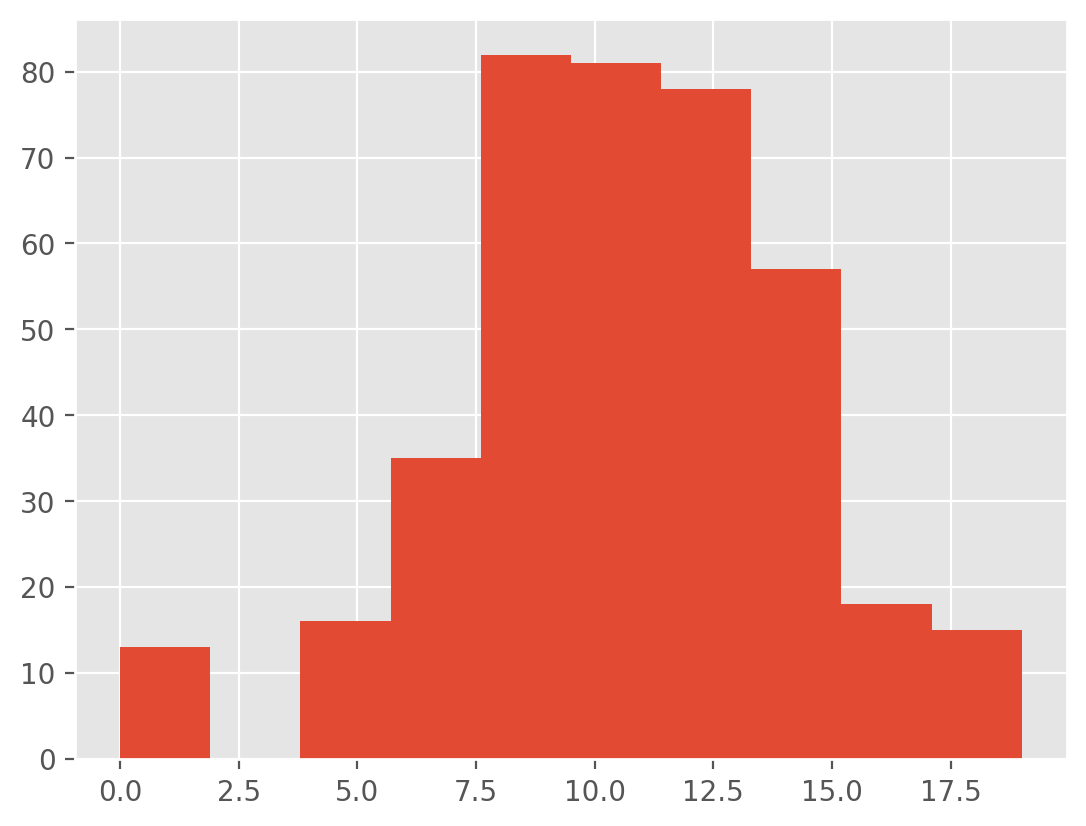

In [266]:
datos1.G2.hist()

<Axes: >

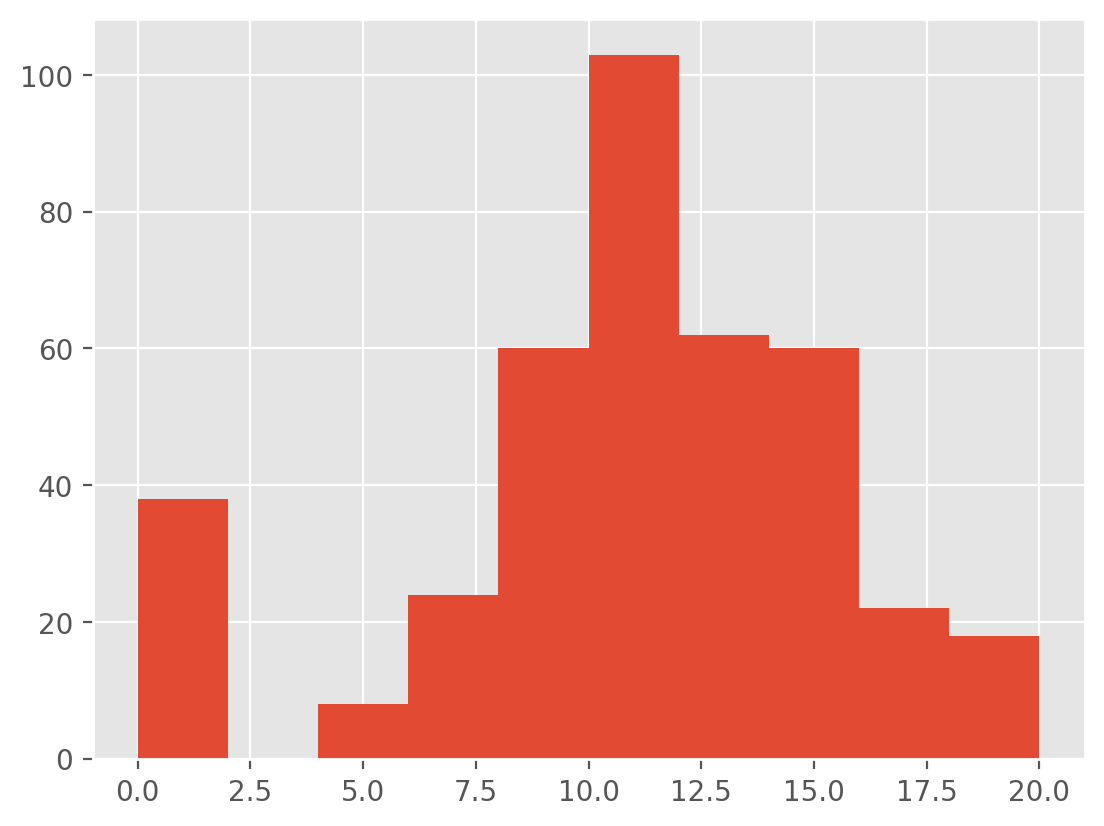

In [267]:
datos1.G3.hist()

<Axes: >

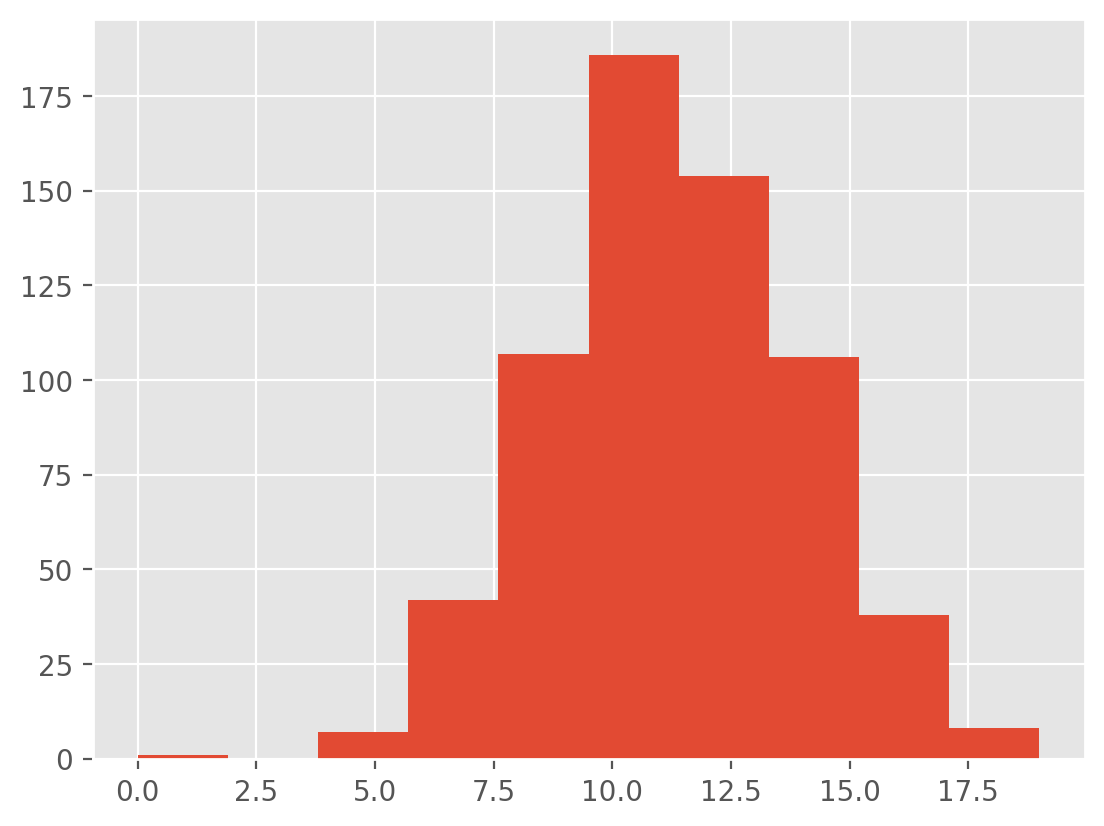

In [268]:
datos2.G1.hist()

<Axes: >

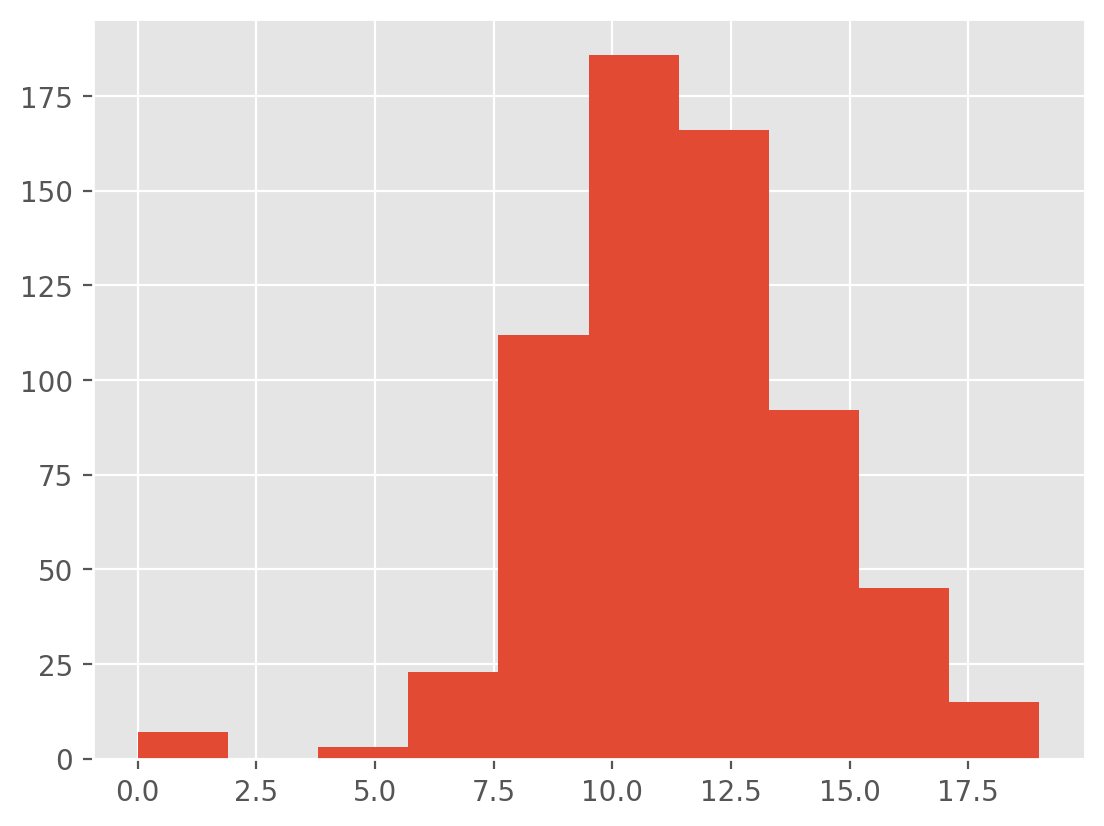

In [269]:
datos2.G2.hist()

<Axes: >

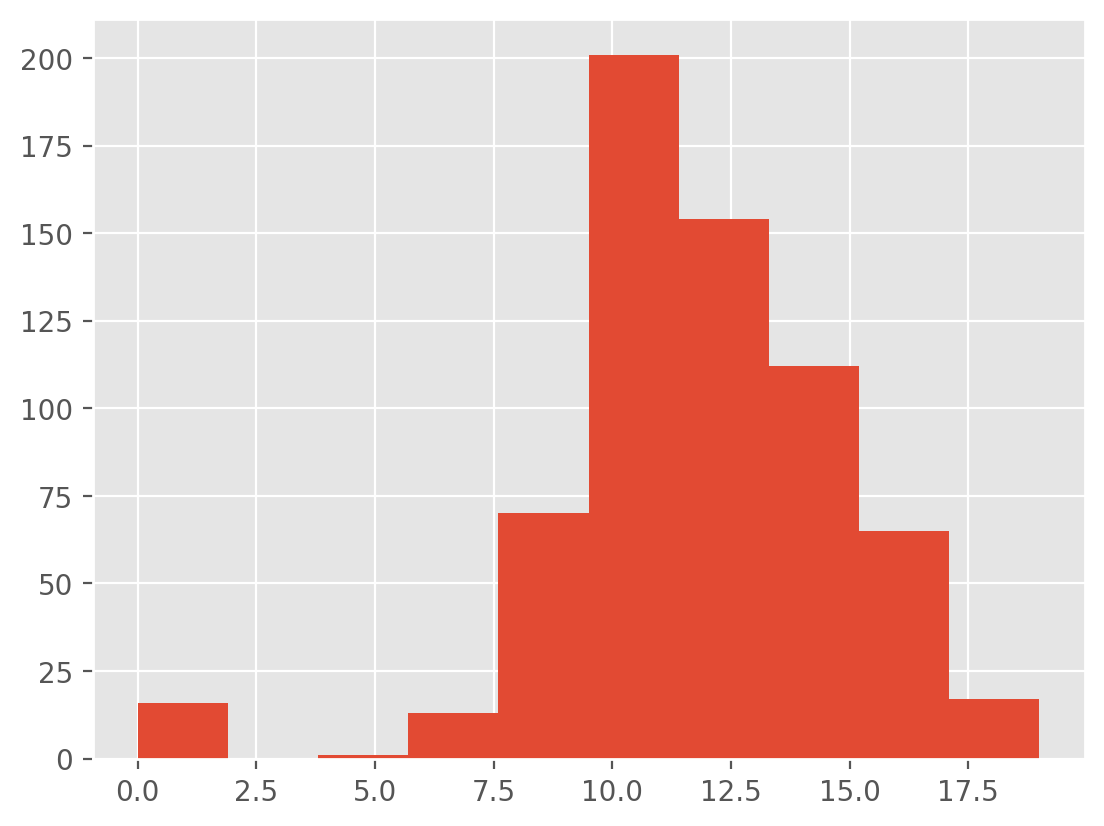

In [270]:
datos2.G3.hist()

<Axes: xlabel='G3', ylabel='Count'>

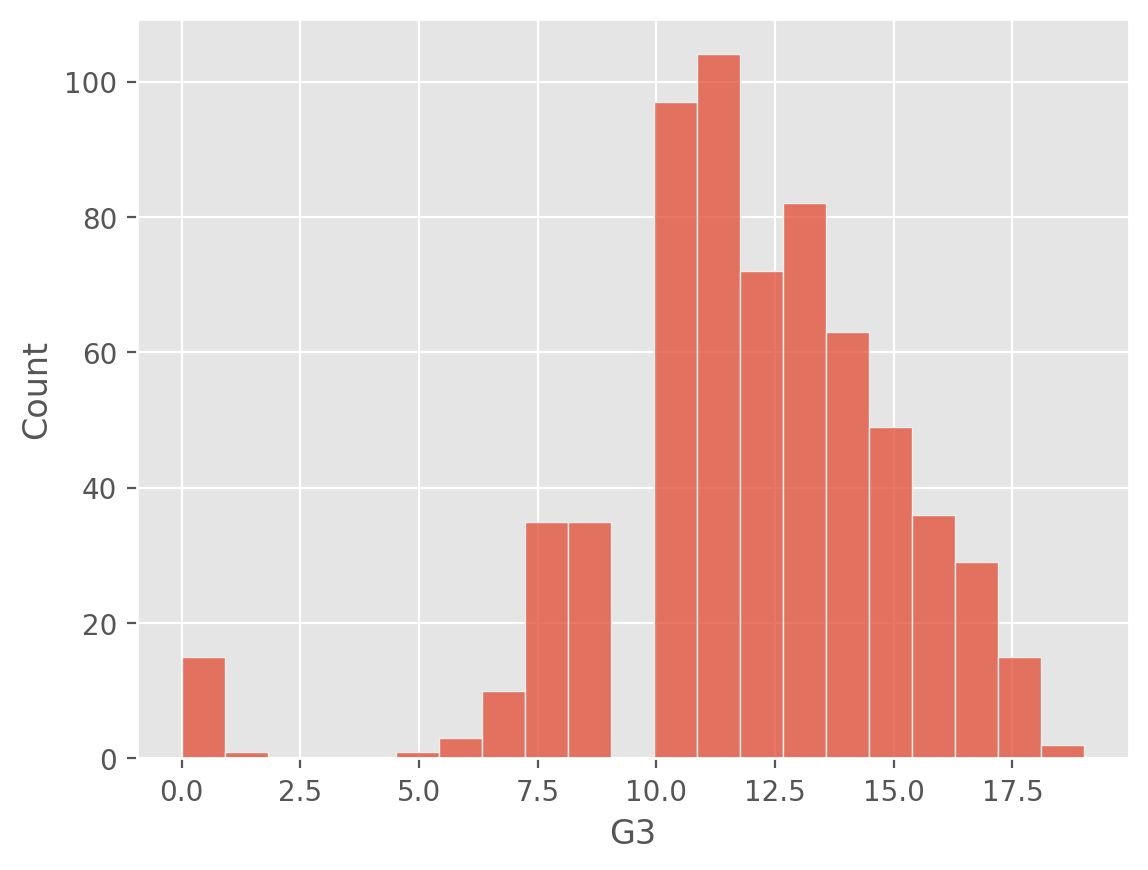

In [271]:
sns.histplot(data=datos2, x="G3")

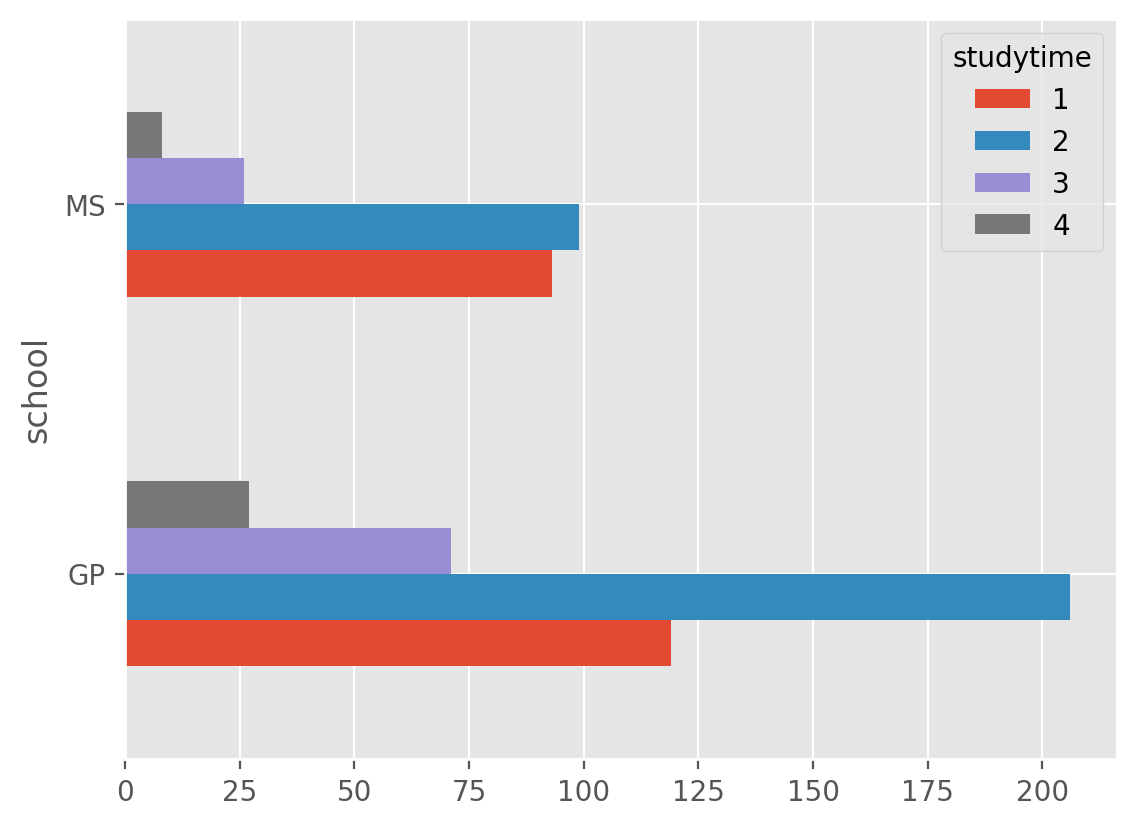

In [272]:
pd.crosstab(datos2.school,datos2.studytime).plot(kind='barh')
plt.xticks(rotation=0)
plt.show()

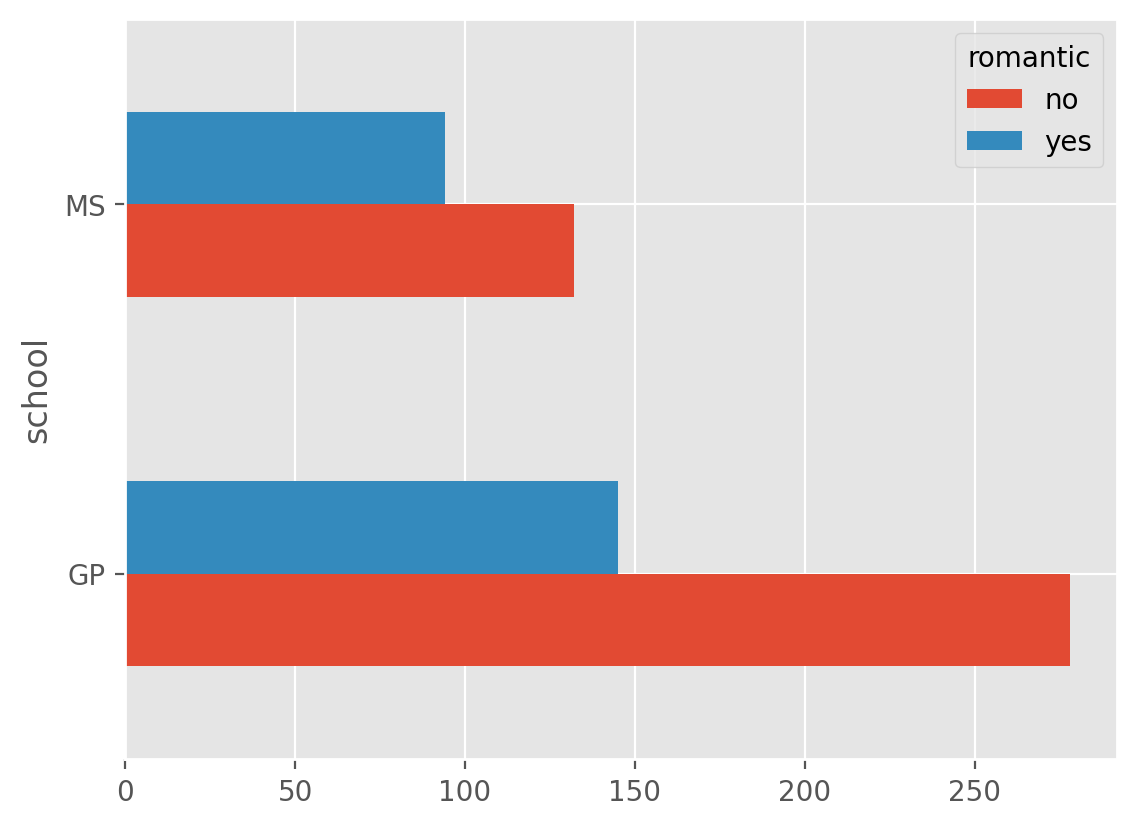

In [273]:
pd.crosstab(datos2.school,datos2.romantic).plot(kind='barh')
plt.xticks(rotation=0)
plt.show()


In [274]:
datos2.groupby('romantic').G3.mean()

romantic
no     12.129268
yes    11.523013
Name: G3, dtype: float64

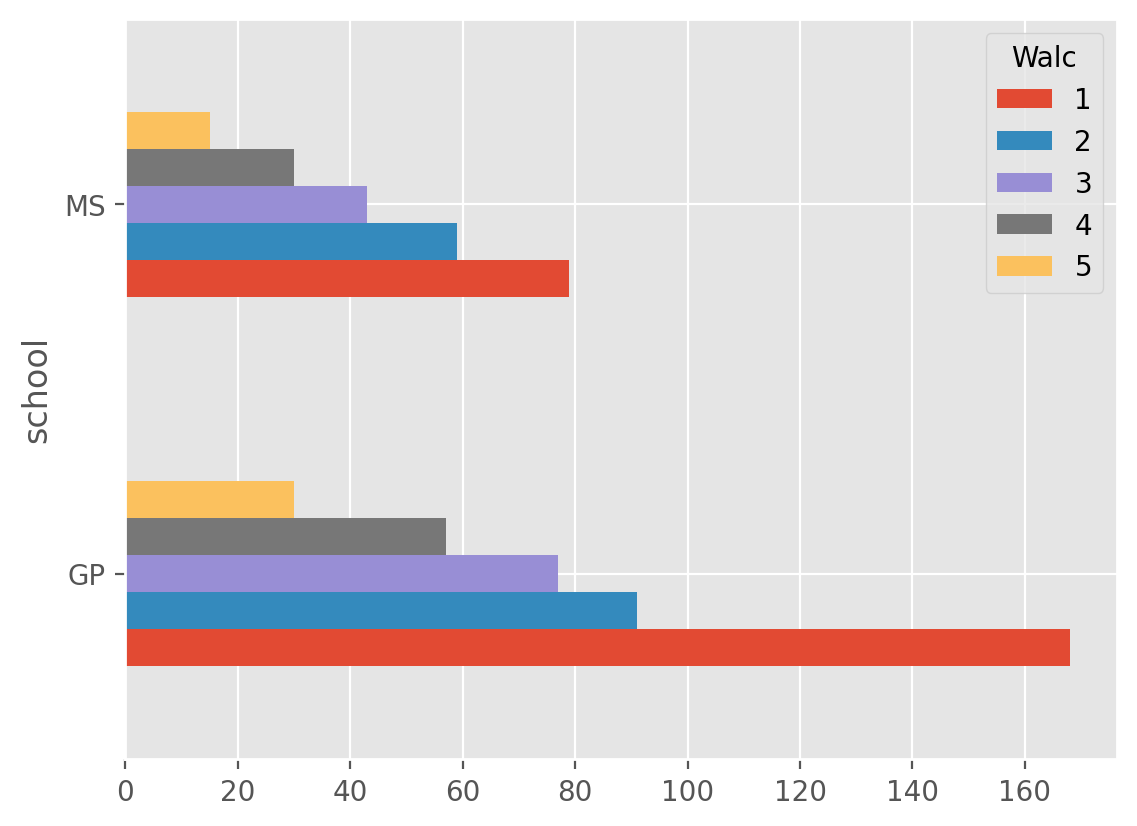

In [275]:
pd.crosstab(datos2.school,datos2.Walc).plot(kind='barh')
plt.xticks(rotation=0)
plt.show()

In [276]:
datos2.groupby('Walc').G3.mean()

Walc
1    12.360324
2    12.260000
3    11.666667
4    11.034483
5    10.555556
Name: G3, dtype: float64

In [277]:
datos2[datos2.G3>0].groupby('sex').G3.mean()

sex
F    12.481383
M    11.759690
Name: G3, dtype: float64

In [278]:
datos2[datos2.G3>0].groupby('sex').G3.max()

sex
F    19
M    19
Name: G3, dtype: int64

In [279]:
datos2[datos2.G3>0].groupby('sex').G3.min()

sex
F    7
M    1
Name: G3, dtype: int64

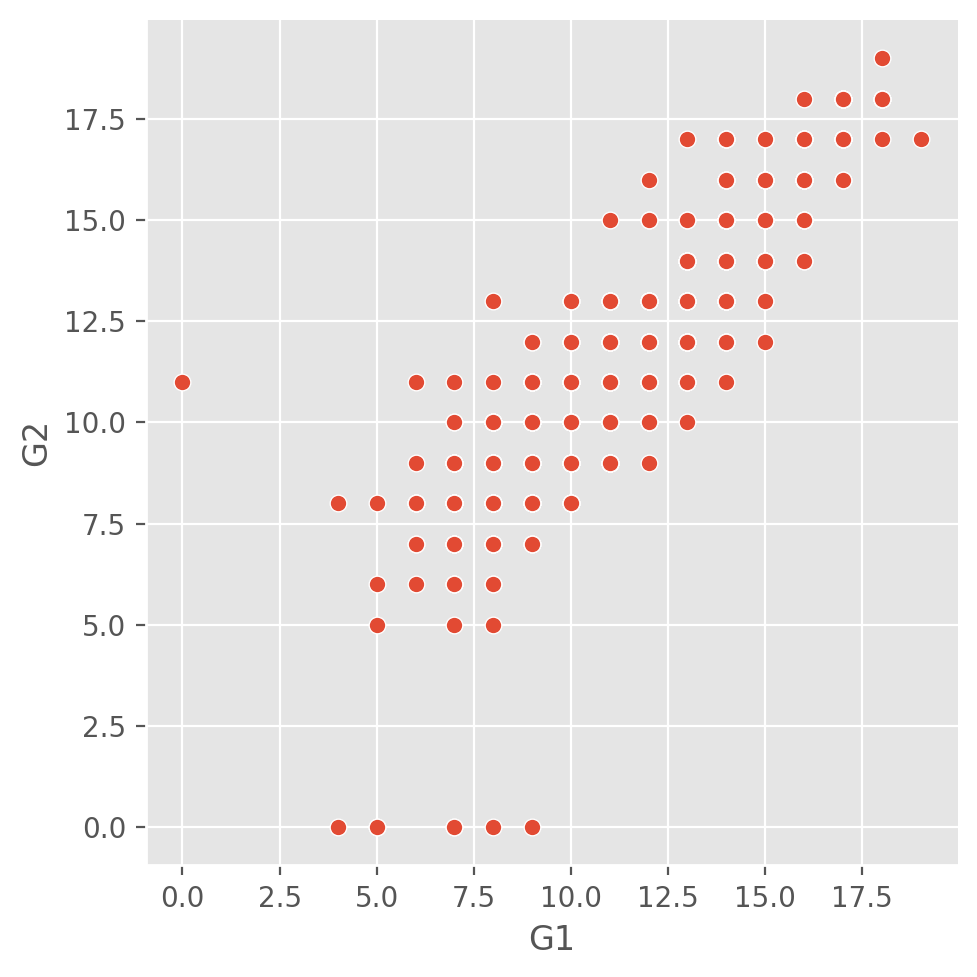

In [280]:
sns.relplot(x='G1', y='G2', data=datos2)

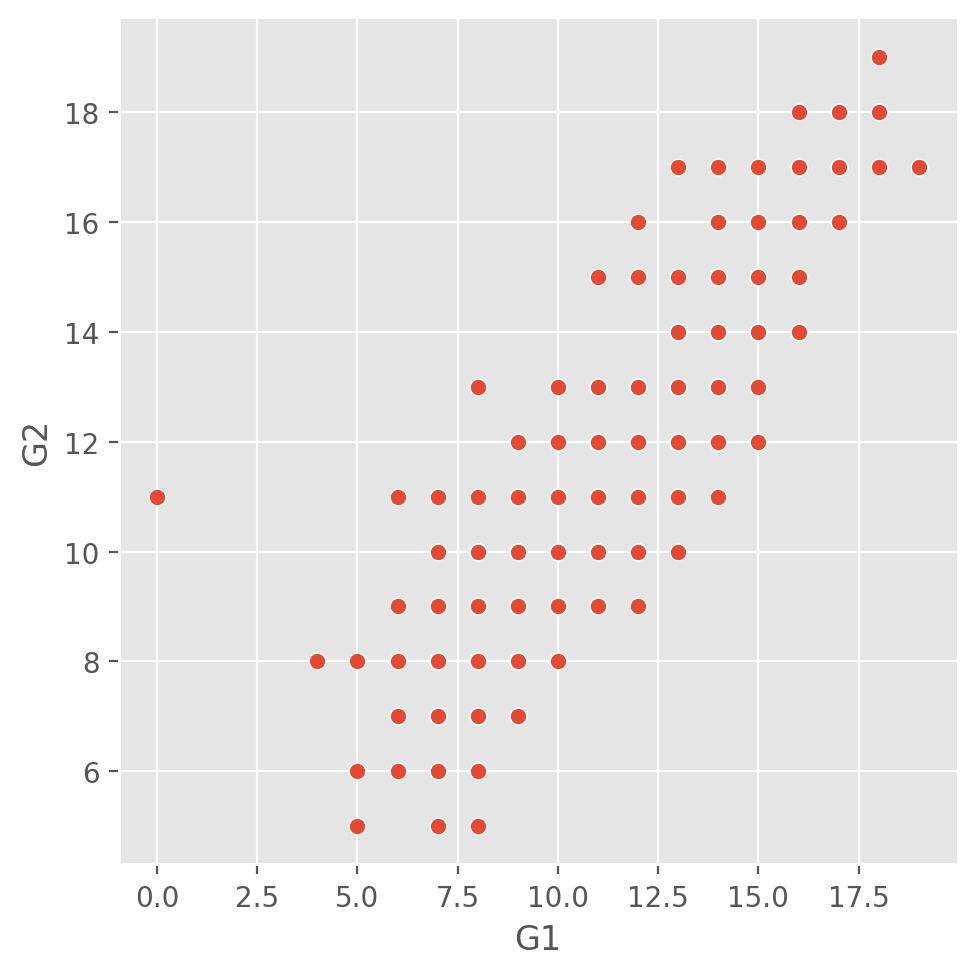

In [281]:
sns.relplot(x='G1', y='G2', data=datos2[datos2.G2>0])

<Axes: xlabel='school', ylabel='G1'>

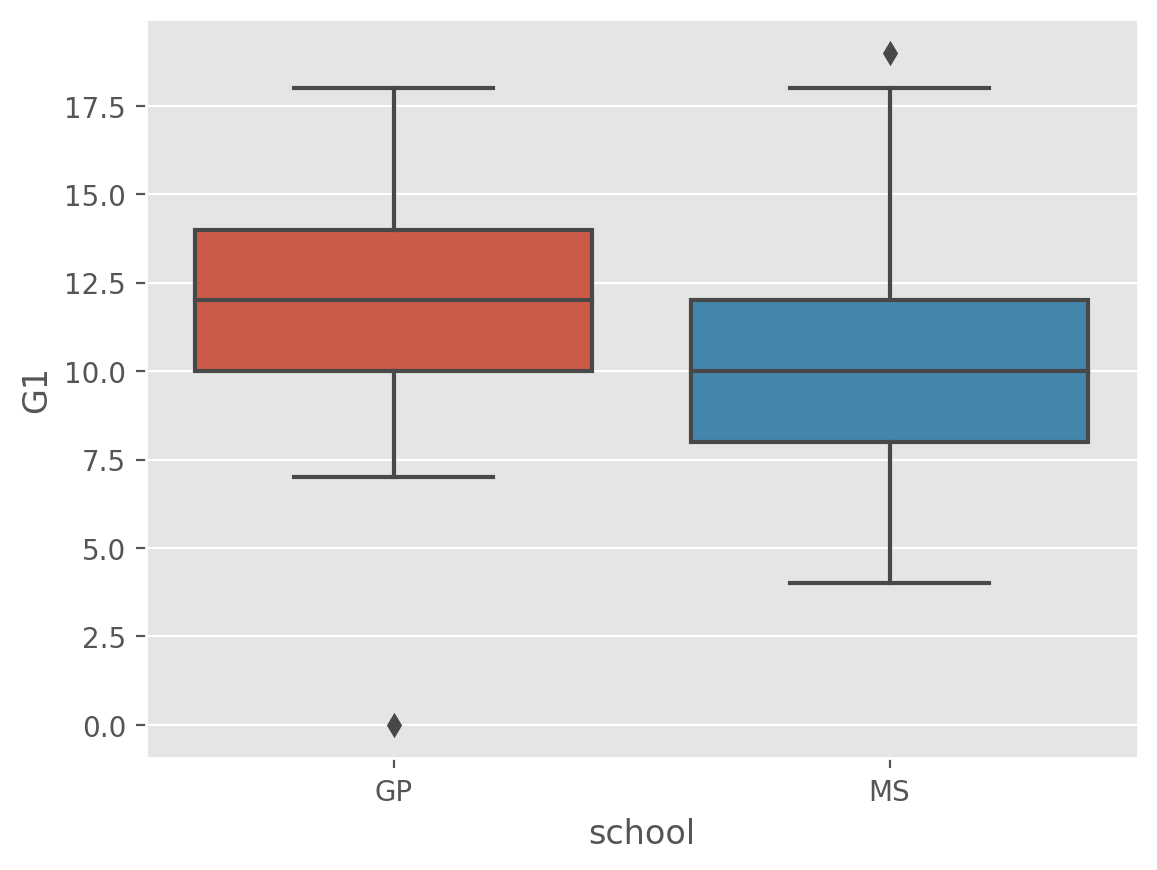

In [322]:
sns.boxplot(x='school', y="G1", data=datos2)

<Axes: xlabel='school', ylabel='G2'>

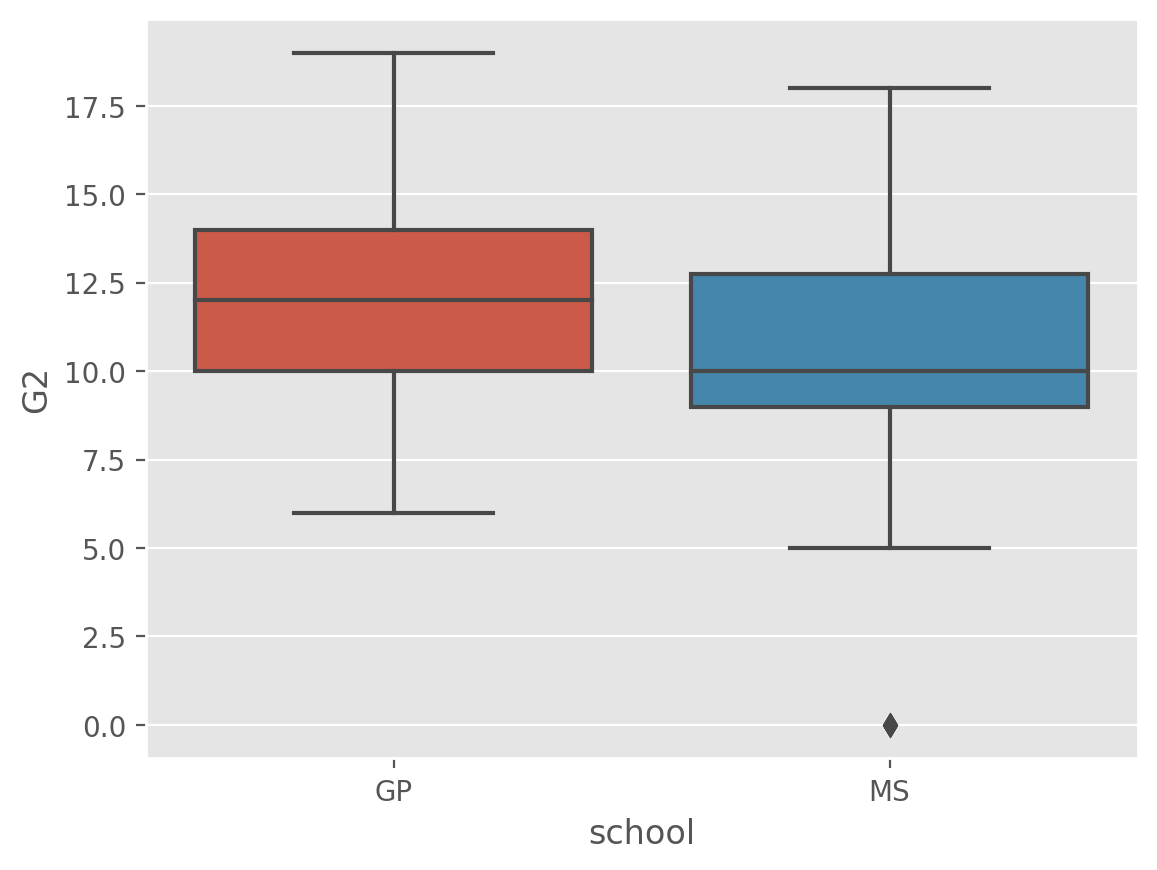

In [283]:
sns.boxplot(x='school', y="G2", data=datos2)

<Axes: xlabel='school', ylabel='G3'>

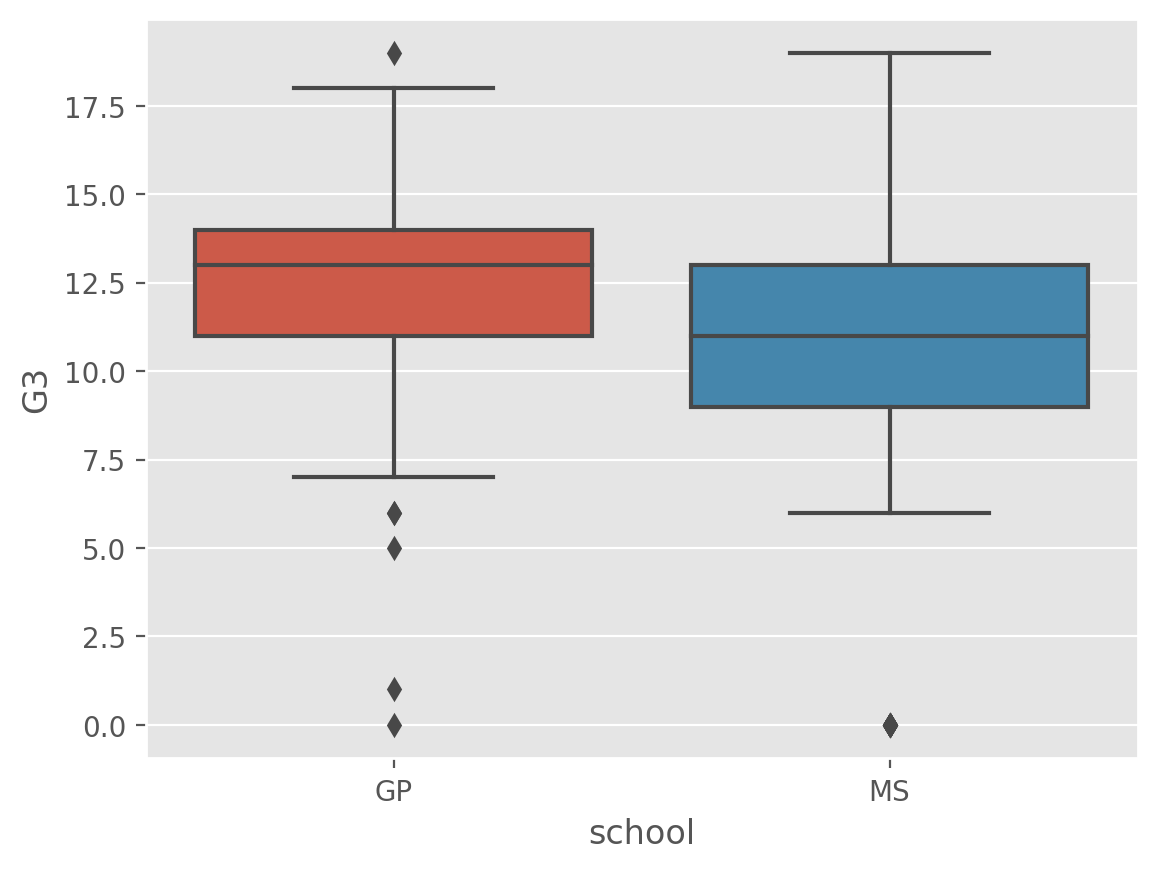

In [284]:
sns.boxplot(x='school', y="G3", data=datos2)

In [302]:
datos2.corr ()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


La aprobación del curso de portugués tiene mayor correlación con la relación familiar, con la salida de amigos, con la salud, con las ausencias,

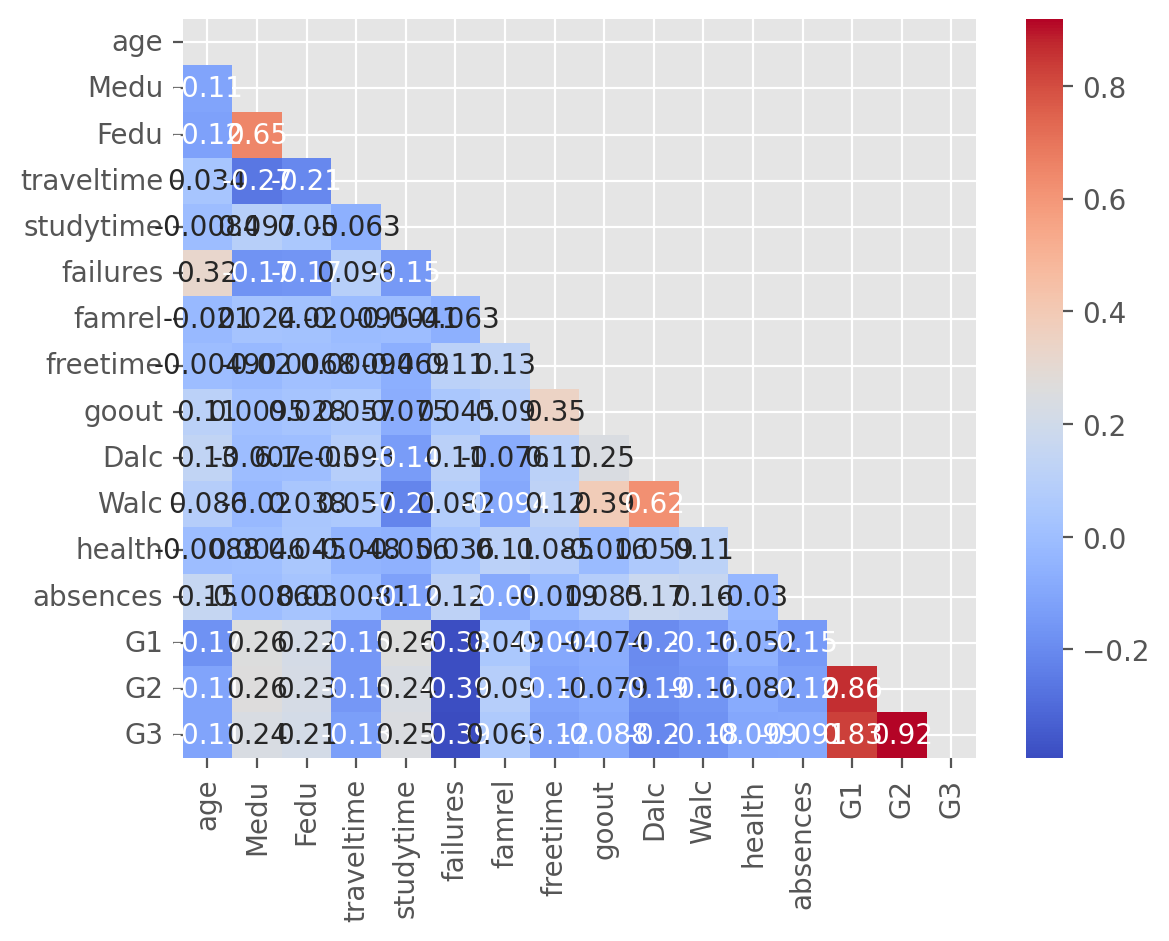

In [319]:

from numpy.ma.core import size
corr= datos2.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=matrix)
plt.show()

In [285]:
datos2_1=datos2[datos2.G3>0]
datos2_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [328]:
datos1_1=datos1[datos1.G3>0]
datos1_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Condicion
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Desaprobado
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Desaprobado
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Desaprobado
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Aprobado
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Desaprobado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,Desaprobado
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,Aprobado
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,Desaprobado
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,Desaprobado


In [329]:
import statistics

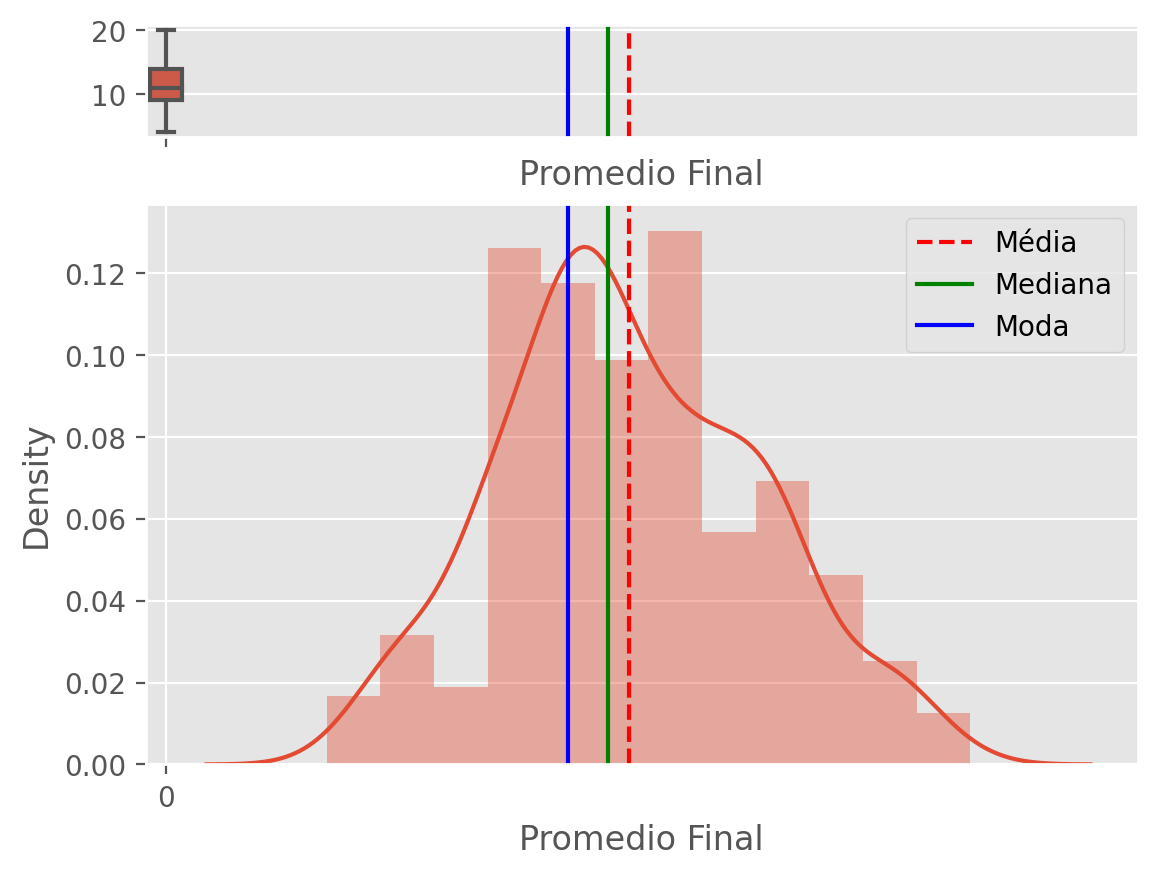

In [330]:
datos=datos1_1
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=datos['G3'].mean()
median=datos['G3'].median()
mode = statistics.mode(datos['G3'])

# Para el Boxplot
sns.boxplot(datos['G3'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')


# Para el Histograma
sns.distplot(datos['G3'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Média')
ax_hist.axvline(median, color='g', linestyle='-', label='Mediana')
ax_hist.axvline(mode, color='b', linestyle='-', label='Moda')


plt.legend()


ax_box.set(xlabel='Promedio Final')
ax_hist.set(xlabel='Promedio Final')
plt.show()

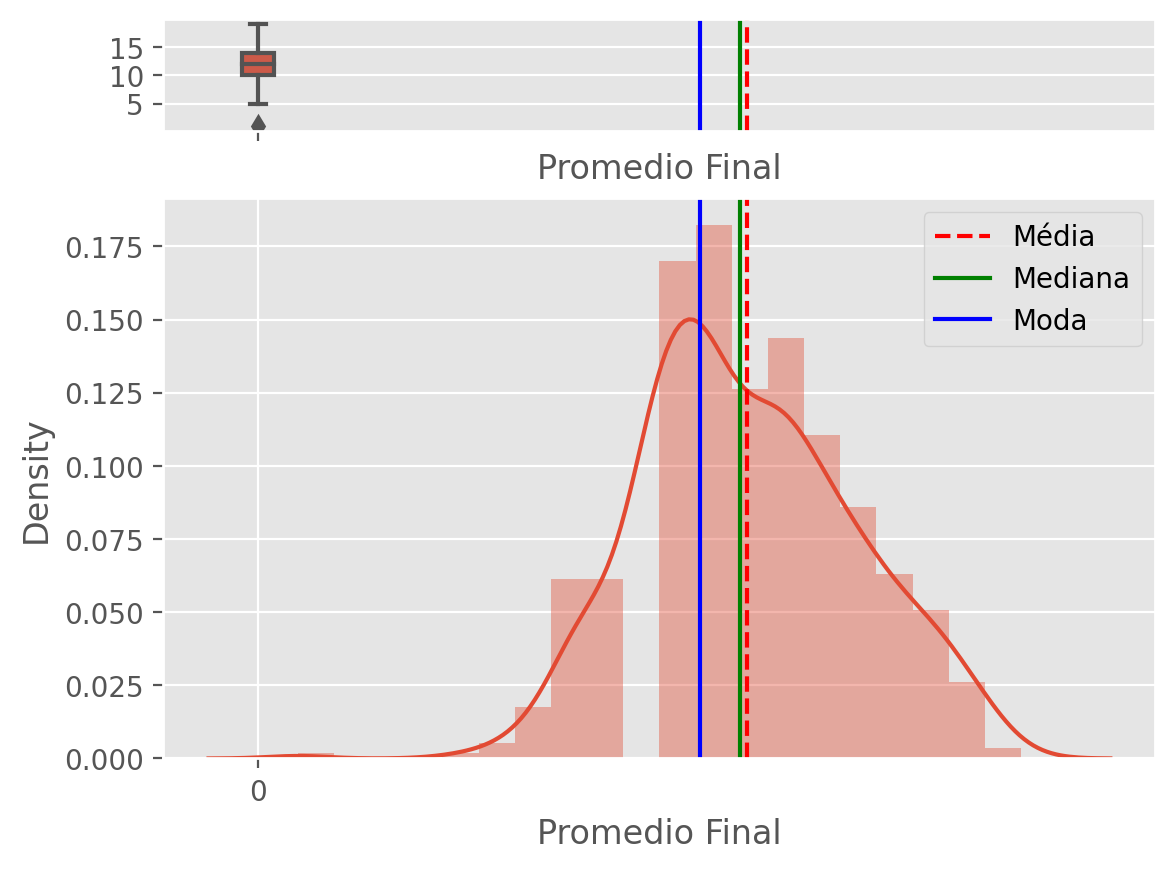

In [287]:
datos=datos2_1
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=datos['G3'].mean()
median=datos['G3'].median()
mode = statistics.mode(datos['G3'])

# Para el Boxplot
sns.boxplot(datos['G3'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')


# Para el Histograma
sns.distplot(datos['G3'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label='Média')
ax_hist.axvline(median, color='g', linestyle='-', label='Mediana')
ax_hist.axvline(mode, color='b', linestyle='-', label='Moda')


plt.legend()


ax_box.set(xlabel='Promedio Final')
ax_hist.set(xlabel='Promedio Final')
plt.show()

In [288]:
from scipy.stats import chi2_contingency


- **H0: Existe independencia entre el sexo y el nivel de consumo de alcohol los fines de semana**
- **Ha: Existe dependencia entre el sexo y el nivel de consumo de alcohol los fines de semana**

In [289]:
Tab=pd.crosstab(datos2.sex,datos2.Walc)
Tab.index=['Mujeres','Hombres']
Tab.columns=['Very Low','Low','Regular','High','Very High']
Tab

,Very Low,Low,Regular,High,Very High
Mujeres,176,99,71,30,7
Hombres,71,51,49,57,38


In [290]:
c, p, dof, expected = chi2_contingency(Tab)
print('El p-valor es',p)

El p-valor es 1.8863257108548898e-15


In [291]:
def condiciones(data):
  if (data["G3"] >= 11):
    return "Aprobado"
  else:
    return "Desaprobado"

In [292]:
datos2["Condicion"] = datos2.apply(condiciones,axis=1)

In [293]:
datos2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Condicion
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Aprobado
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Aprobado
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Aprobado
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Aprobado
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Aprobado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Desaprobado
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Aprobado
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Desaprobado
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Desaprobado


In [325]:
datos1["Condicion"] = datos1.apply(condiciones,axis=1)

In [326]:
pd.crosstab(datos1.sex,datos1.Condicion)

Condicion,Aprobado,Desaprobado
sex,,
F,103,105
M,106,81


In [323]:
pd.crosstab(datos2.sex,datos2.Condicion)

Condicion,Aprobado,Desaprobado
sex,,
F,281,102
M,171,95


- **H0: Existe independencia entre poseer tener internet y la aprobación del curso**
- **Ha: Existe dependencia entre poseer el internet y la aprobación del curso**

In [294]:
Tab=pd.crosstab(datos2.internet,datos2.Condicion)
Tab.columns=['no','yes']
Tab.index=['Aprobado','Desaprobado']
Tab

,no,yes
Aprobado,90,61
Desaprobado,362,136


In [295]:
c, p, dof, expected = chi2_contingency(Tab)
print('El p-valor es',p)

El p-valor es 0.0030460183036926905


Como el p valor es menor a 0.05 se rechaza la hipotesis cero, y se acepta la hipotesis alternativa, existe dependencia entre poseer internet y aprobar el curso.